## Analisar impacto de vendas - exemplo 1

In [1]:
import numpy as np
import pandas as pd

np.random.seed(40)

# tamanho das amostras
n_controle = 800
n_experimental = 800

#Dados do grupo de controle
vendas_inicial_controle = np.random.normal(200, 20, n_controle)
vendas_final_controle = vendas_inicial_controle + np.random.normal(5, 10, n_controle)

#Dados do grupo experimental
vendas_inicial_experimental = np.random.normal(200, 20, n_experimental)
vendas_final_experimental = vendas_inicial_experimental + np.random.normal(20, 15, n_experimental)

#criando dataframe

dados = pd.DataFrame({ 
    'Grupo': ['Controle']*n_controle + ['Experimental']*n_experimental, 
    'Vendas Inicial': np.concatenate([vendas_inicial_controle, vendas_inicial_experimental]), 
    'Vendas Final': np.concatenate([vendas_final_controle, vendas_final_experimental])
    })

#Calcula o aumento das vendas
dados['Aumento'] = dados['Vendas Final'] - dados['Vendas Inicial']

dados.head()

,Grupo,Vendas Inicial,Vendas Final,Aumento
0,Controle,187.849046,189.729611,1.880565
1,Controle,197.477272,193.152969,-4.324303
2,Controle,186.307873,183.634208,-2.673664
3,Controle,218.574295,221.282498,2.708203
4,Controle,163.111979,161.784306,-1.327673


In [2]:
dados.groupby('Grupo')['Aumento'].describe()

,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
Controle,800.0,5.789400,9.999011,-26.84784,-1.298038,5.345580,12.696298,38.055237
Experimental,800.0,19.839783,15.030806,-38.80638,9.484696,20.006147,30.536072,68.648246


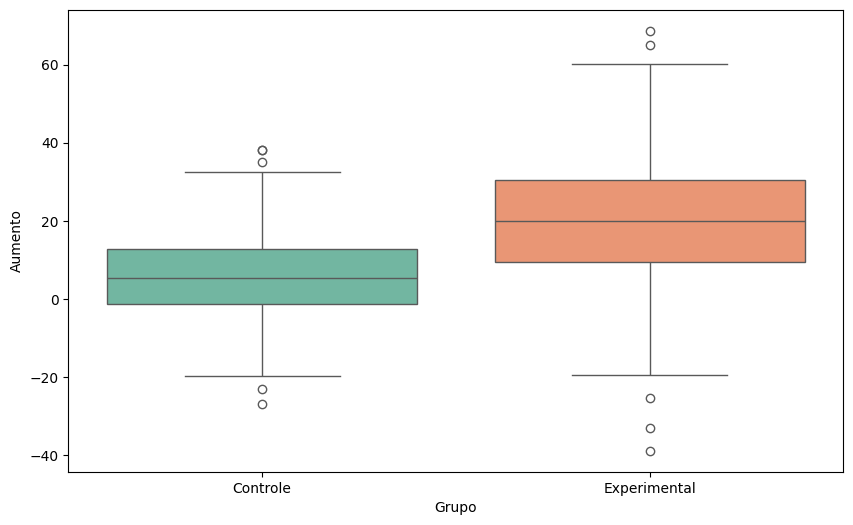

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Aumento', data=dados, hue='Grupo', palette='Set2', dodge=False)
plt.show()


### Teste de hipótese

* H0 = Não há diferença no aumento de vendas entre o grupo e o controle experimental
* H1 = Há uma diferença significativa no aumento de vendas entre os dois grupos


In [7]:
# Teste de hipótese

from scipy import stats

aumento_vendas_controle = dados.query('Grupo == "Controle"')['Aumento']
aumento_vendas_experimental = dados.query('Grupo == "Experimental"')['Aumento']

#Teste t
t_stat, p_value = stats.ttest_ind(aumento_vendas_controle, aumento_vendas_experimental, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -22.013415651811915
P-value: 2.2149222411225198e-92


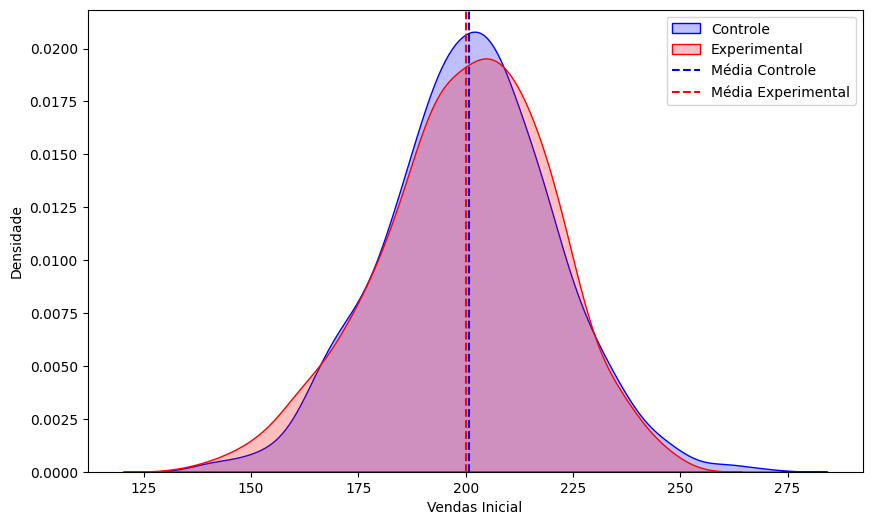

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(vendas_inicial_controle, color='blue', label='Controle', fill=True)
sns.kdeplot(vendas_inicial_experimental, color='red', label='Experimental', fill=True)
plt.axvline(np.mean(vendas_inicial_controle), color='blue', linestyle='--', label='Média Controle')
plt.axvline(np.mean(vendas_inicial_experimental), color='red', linestyle='--', label='Média Experimental')
plt.xlabel('Vendas Inicial')
plt.ylabel('Densidade')
plt.legend()
plt.show()



### Que tipo de teste está sendo utilizado?
Foi usado o tipo de teste de t de amostras indepedentes

### A diferença média nas vendas entre as lojas é significativa?
De acordo com o p_valor obtido, e adotando um o_valor médio de 0,05, e o nosso obtido foi de aproximadatamento 2.21, a diferença média nas vendas entre as lojas não é significativa, sugerindo que a nova estratégia de marketing pode não ter tido um impacto mensurável nas vendas.

## Análise de durabilidade média de uma nova bateria - exemplo 2

In [12]:
np.random.seed(40)

#Durabilidade das baterias em horas
durabilidade_baterias = np.random.normal(310, 15, 100)

#Durabilidade esperada
durabilidade_esperada = 300


In [13]:
#Teste de hipótese
t_stat, p_value = stats.ttest_1samp(durabilidade_baterias, durabilidade_esperada)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 6.5868659795286835
P-value: 2.182483958432169e-09


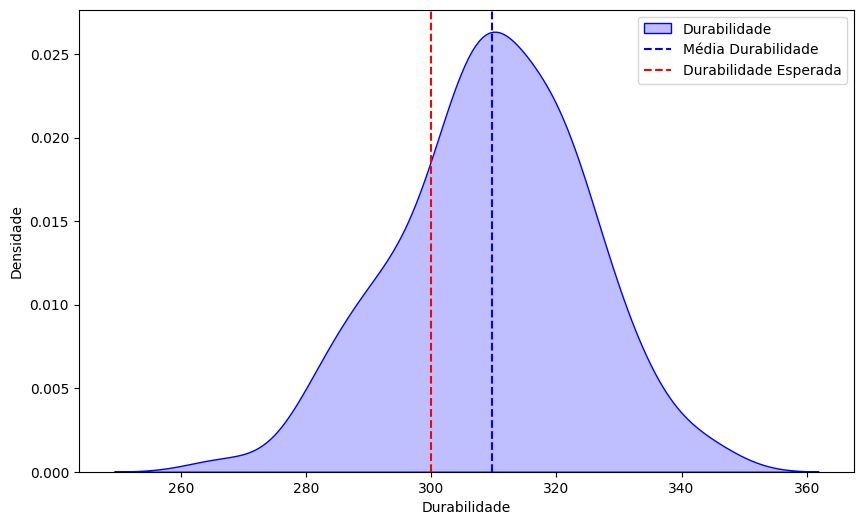

In [14]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(durabilidade_baterias, color='blue', label='Durabilidade', fill=True)
plt.axvline(np.mean(durabilidade_baterias), color='blue', linestyle='--', label='Média Durabilidade')
plt.axvline(durabilidade_esperada, color='red', linestyle='--', label='Durabilidade Esperada')
plt.xlabel('Durabilidade')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [15]:
alpha = 0.05
if (p_value / 2) < alpha and t_stat > 0:
    print("A durabilidade média das baterias é significativamente maior que 300 horas.")
else:
    print("Não há evidências suficientes para concluir que a durabilidade média é maior que 300 horas.")

A durabilidade média das baterias é significativamente maior que 300 horas.


### Que tipo de teste está sendo utilizado?
Para este caso, o teste t para uma amostra única foi utilizado, pois queremos comparar a média das durabilidades das baterias produzidas com o valor específico de 300 horas

### A durabilidade média das baterias produzidas é significativamente diferente do valor esperado?

A durabilidade média das baterias produzidas é significativamente maior do que 300 horas, indicando que a nova bateria atende ou supera a durabilidade média esperada.

## Análise eficácia de um novo programa de exercícios - exemplo 3

In [16]:
np.random.seed(40)

# pesos dos participantes antes e depois do programa de exercícios
peso_antes = np.random.normal(80, 5, 30)  
peso_depois = peso_antes - np.random.normal(2, 1, 30)


In [ ]:
# Executar o teste t pareado
t_stat, p_value = stats.ttest_rel(peso_antes, peso_depois)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value / 2}')  # teste unilateral, por isso dividiu por 2 (pegou uam cauda)


T-statistic: 11.592192519495368
P-value: 1.0443660211885834e-12


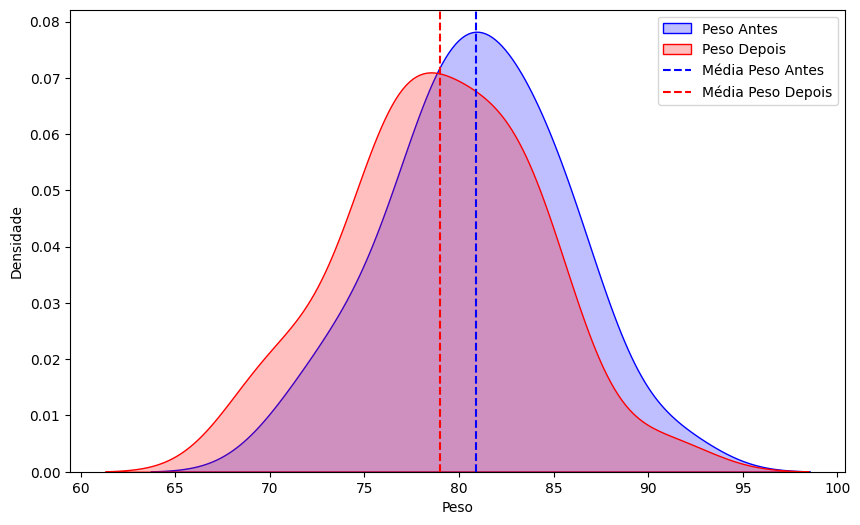

In [18]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(peso_antes, color='blue', label='Peso Antes', fill=True)
sns.kdeplot(peso_depois, color='red', label='Peso Depois', fill=True)
plt.axvline(np.mean(peso_antes), color='blue', linestyle='--', label='Média Peso Antes')
plt.axvline(np.mean(peso_depois), color='red', linestyle='--', label='Média Peso Depois')
plt.xlabel('Peso')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [19]:
# Análise do resultado
alpha = 0.05
if (p_value / 2) < alpha and t_stat > 0:
    print("Houve uma redução significativa no peso dos participantes após o programa.")
else:
    print("Não há evidências suficientes para concluir que houve uma redução significativa no peso.")

Houve uma redução significativa no peso dos participantes após o programa.


### Que tipo de teste está sendo utilizado?

Foi usado o teste t pareado, por ser o mais adequado, pois temos medições do peso de um mesmo grupo antes e depois do programa de 8 semanas.

### Houve uma redução significativa no peso dos participantes após o programa?

Sim, como pudemos ver de acordo com a análise, houve uma redução significativa no peso dos participantes após o programa, sugerindo que o programa de exercícios foi eficaz.

obs: da para ver melhor no gráfico